In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import PIL 
import scipy
print(tf.__version__)

1.8.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

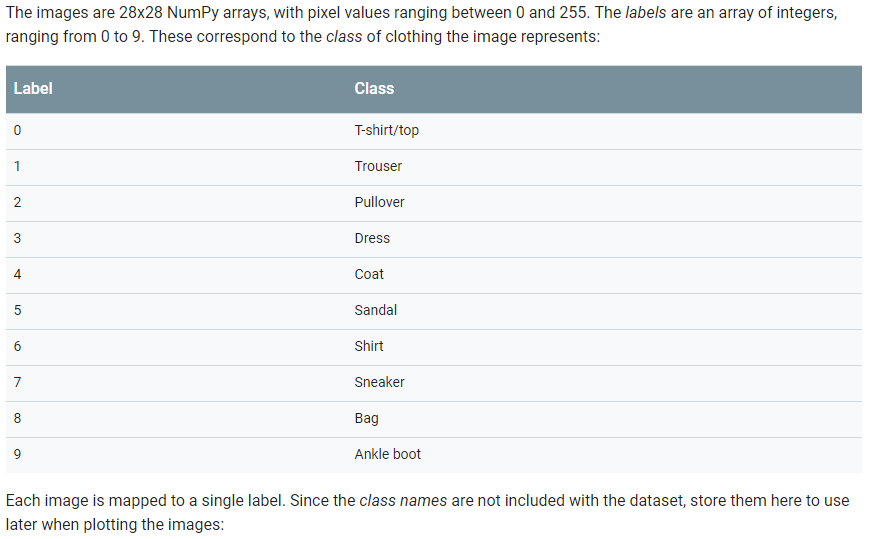

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

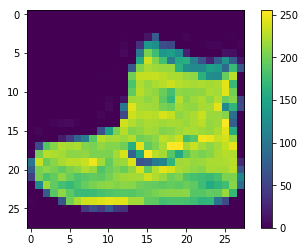

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()#0-250 color range axis is added
plt.gca().grid(False) #remove the grid lines

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

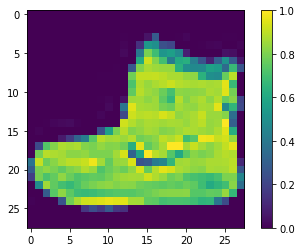

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()#0-250 color range axis is added
plt.gca().grid(False) #remove the grid lines

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


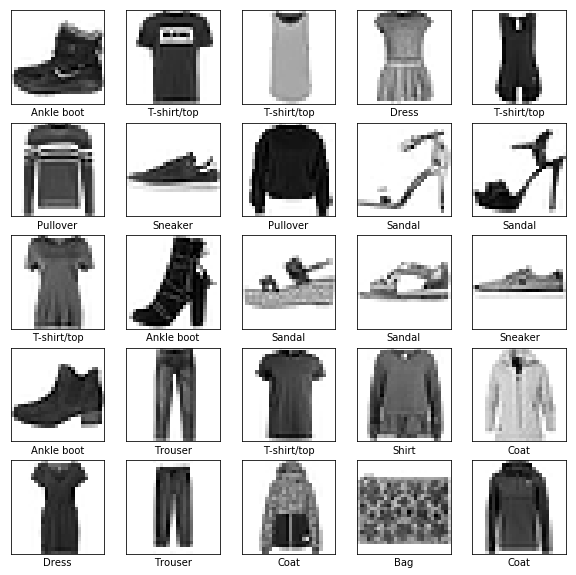

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 digit classes.

Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [34]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model
Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [35]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.5226 - acc: 0.8178
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3925 - acc: 0.8619
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3558 - acc: 0.8704
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3347 - acc: 0.8789
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3176 - acc: 0.8842


Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.8705


Make predictions

With the model trained, we can use it to make predictions about some images.

In [37]:
predictions = model.predict(test_images)

In [38]:
predictions[0]

array([2.3963092e-05, 7.2306905e-10, 3.4183734e-07, 1.4224707e-06,
       1.1694515e-07, 1.2310008e-02, 1.6743108e-05, 5.3395733e-02,
       9.2256843e-05, 9.3415946e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [39]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [40]:
test_labels[0]

9

Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


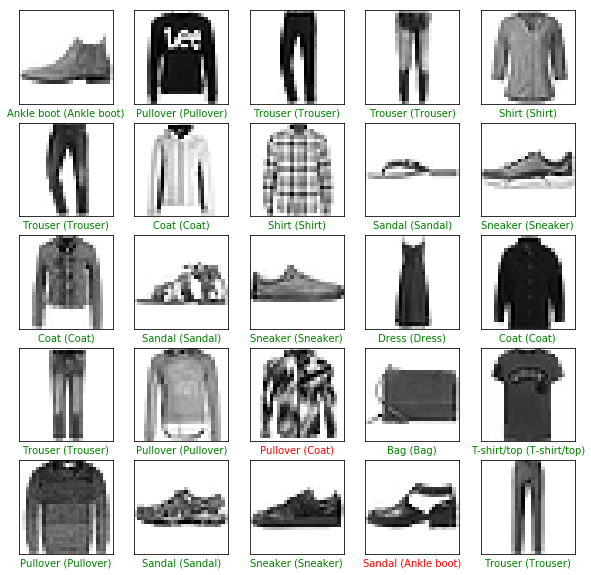

In [41]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

Finally, use the trained model to make a prediction about a single image.

In [42]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [43]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions = model.predict(img)

print(predictions)

[[2.3963092e-05 7.2307038e-10 3.4183799e-07 1.4224707e-06 1.1694527e-07
  1.2310013e-02 1.6743108e-05 5.3395722e-02 9.2256931e-05 9.3415946e-01]]


model.predict returns a list of lists,even though there is only one image. one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [45]:
#prediction = predictions[0]

np.argmax(predictions)

9

(64, 64, 3)

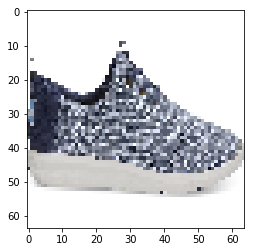

In [67]:
### START CODE HERE ###
img_path = 'sneakers.jpg'
### END CODE HERE ###
img = keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)

x =  keras.preprocessing.image.img_to_array(img)
x.shape

In [64]:

img = (np.expand_dims(x,0))

print(img.shape)

(1, 64, 64, 3)


In [66]:
predictions = model.predict(img)

print(predictions)

AttributeError: 'Image' object has no attribute 'ndim'